## Whole Data

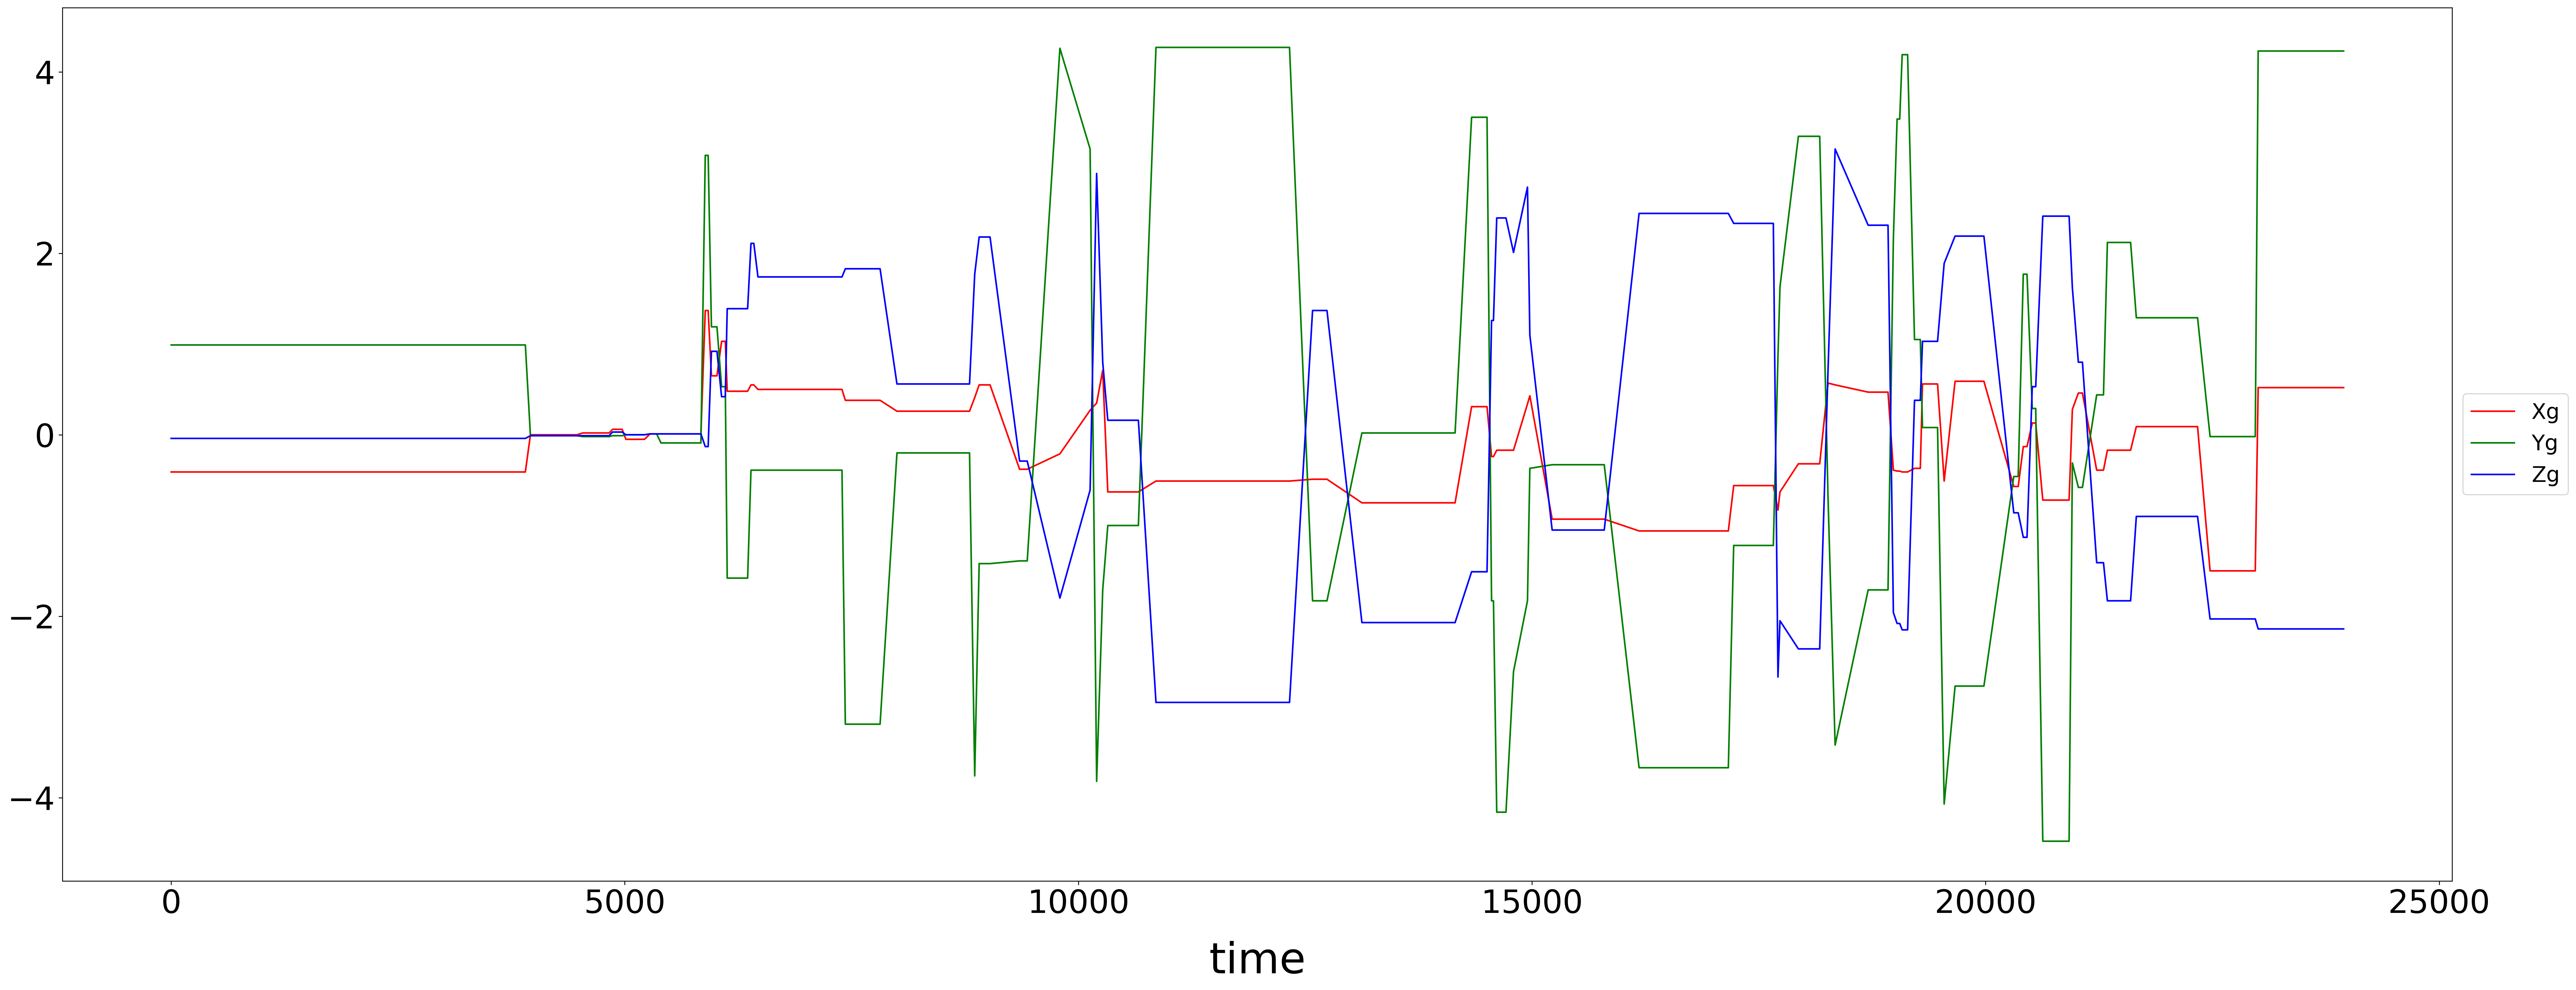

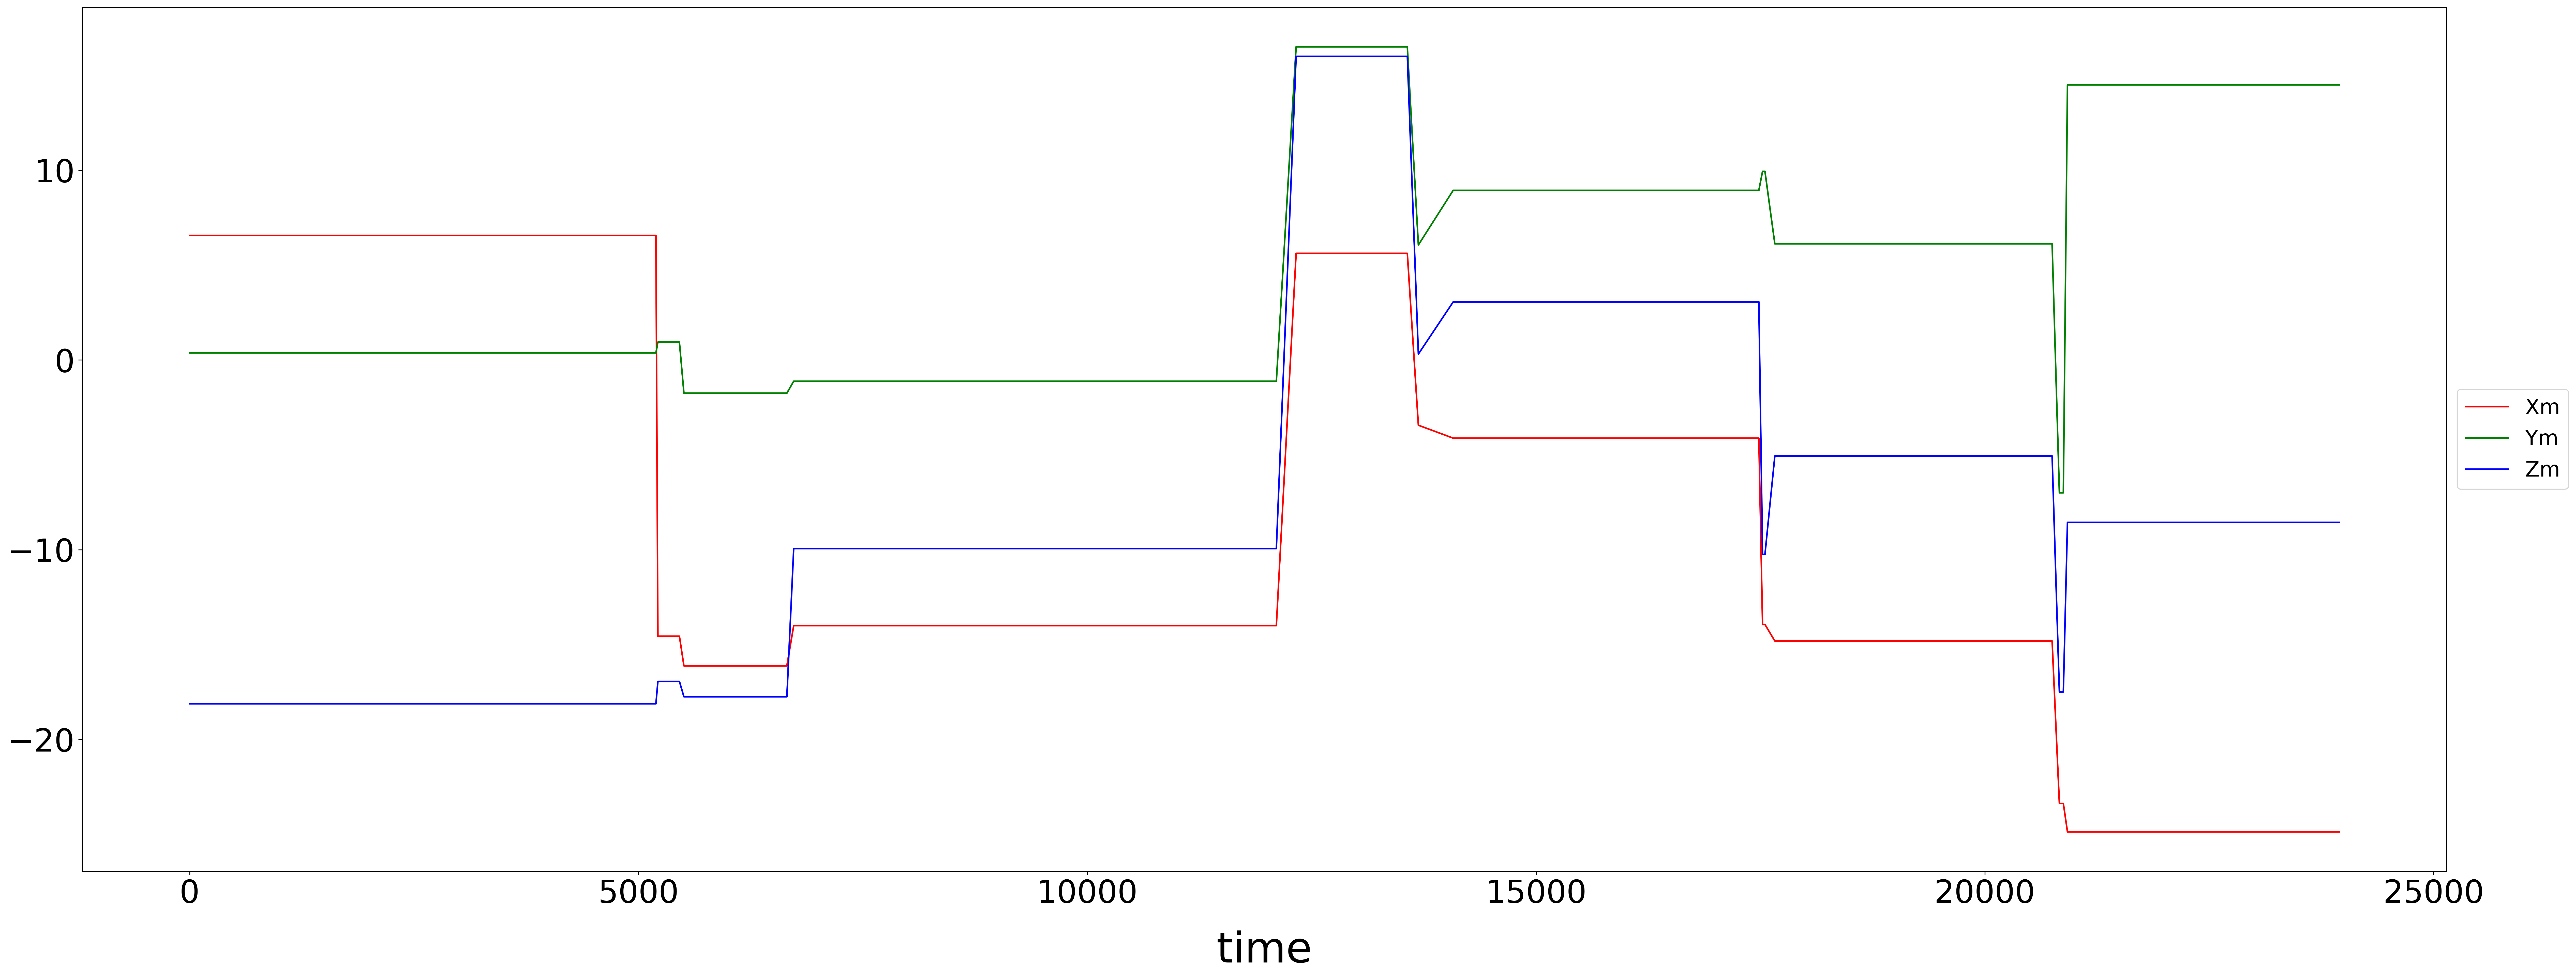

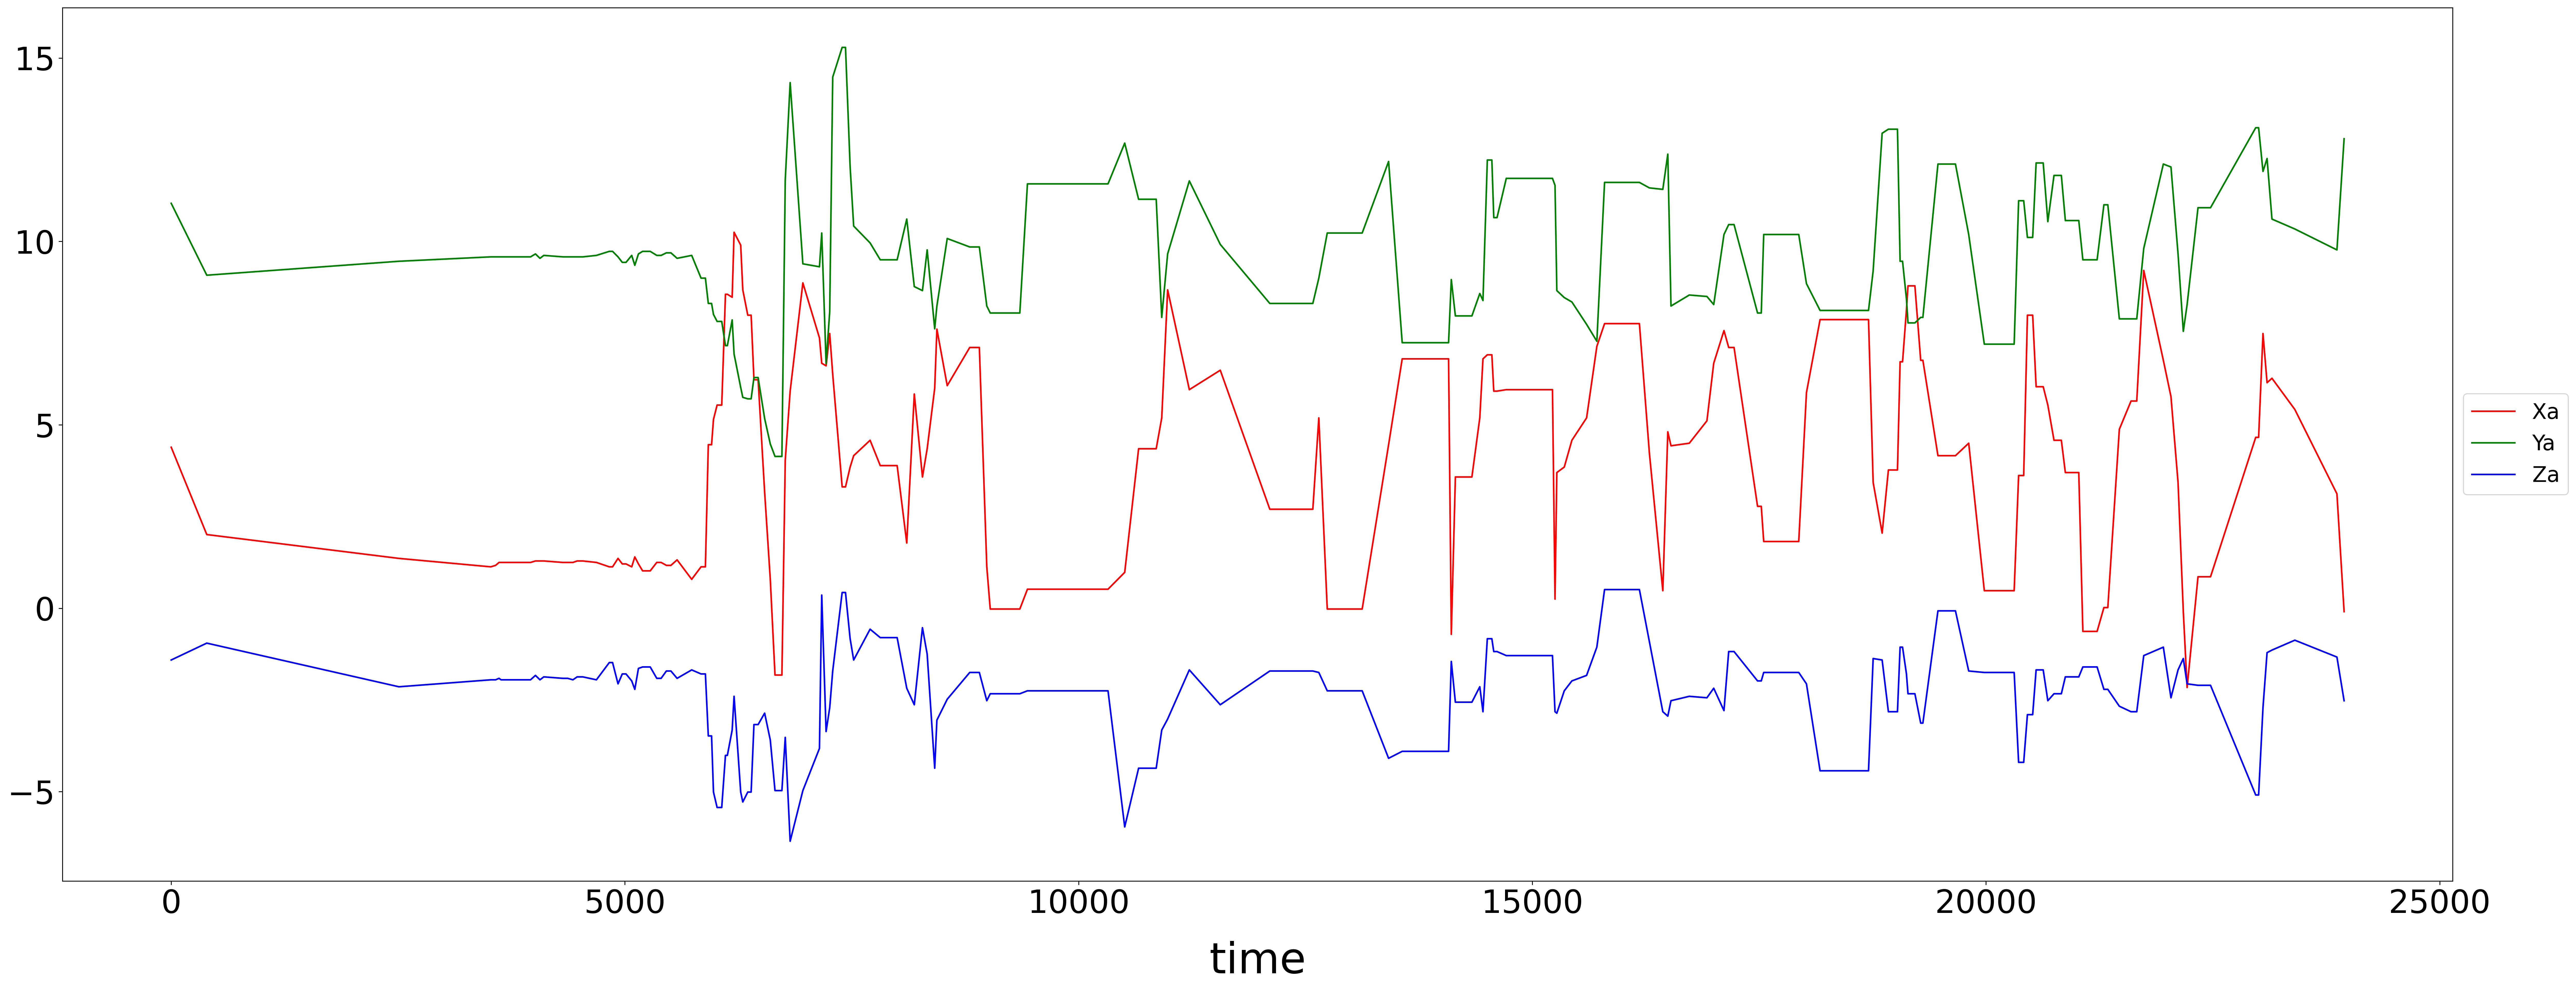

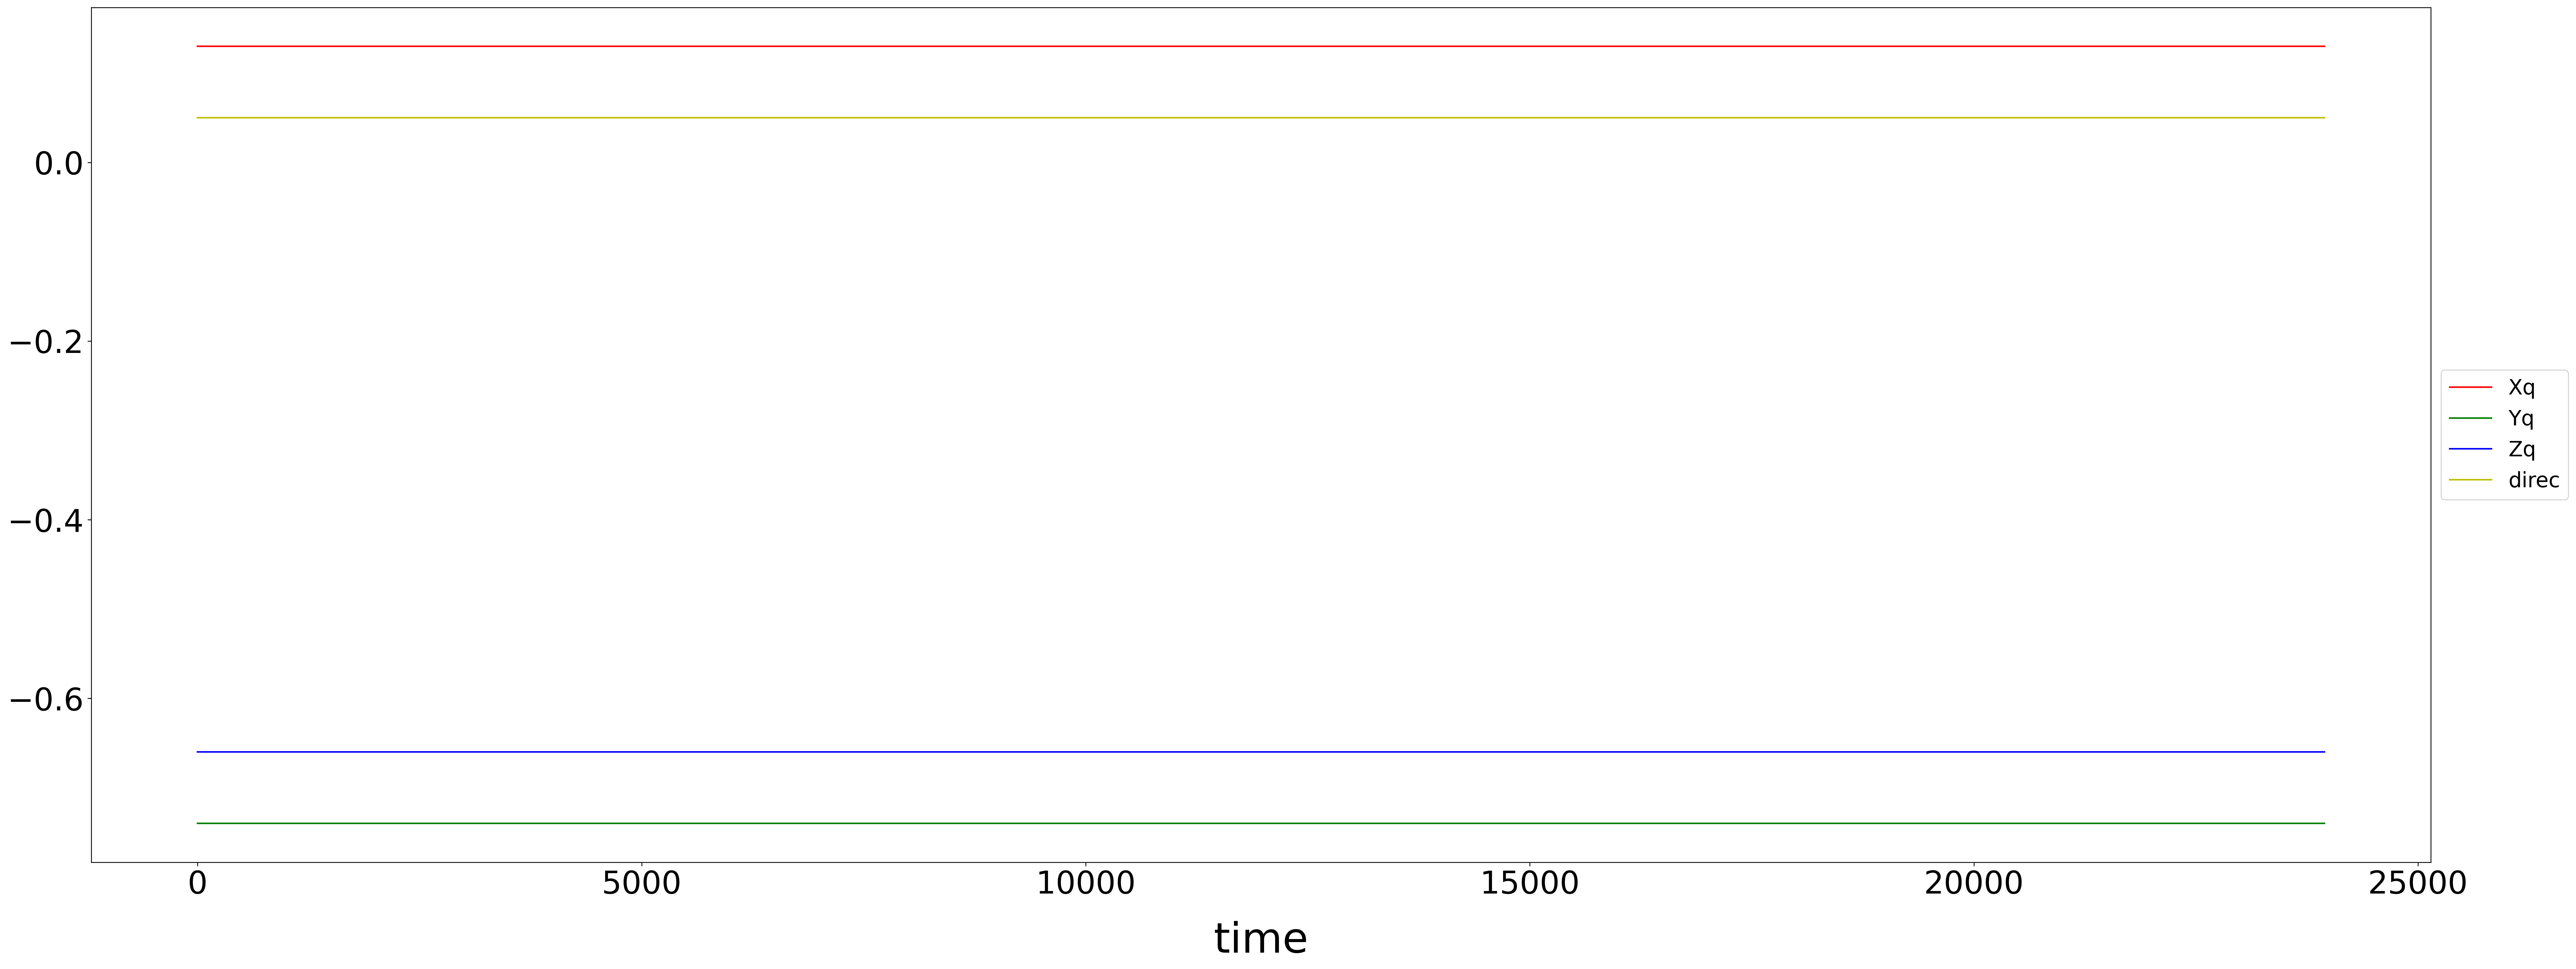

In [21]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft

xg=[]
data = pd.read_csv("./data1_20211227走路資料/手25sec1605cm34step.csv")
data = np.array(data)
x = data[: , 14]
for i in range(len(x)-1,-1,-1):
    x[i]=data[i,14]-data[0,14]

        
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 1], color = 'r', label = "Xg")
plt.plot(x, data[: , 2], color = 'g', label = "Yg")
plt.plot(x, data[: , 3], color = 'b', label = "Zg")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()



plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 4], color = 'r', label = "Xm")
plt.plot(x, data[: , 5], color = 'g', label = "Ym")
plt.plot(x, data[: , 6], color = 'b', label = "Zm")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()


plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 7], color = 'r', label = "Xa")
plt.plot(x, data[: , 8], color = 'g', label = "Ya")
plt.plot(x, data[: , 9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()


plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 10], color = 'r', label = "Xq")
plt.plot(x, data[: , 11], color = 'g', label = "Yq")
plt.plot(x, data[: , 12], color = 'b', label = "Zq")
plt.plot(x, data[: , 13], color = 'y', label = "direc")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()



## 計算波峰波谷

In [33]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fftpack import fft, ifft

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

data = pd.read_csv("data1_20211227走路資料/手25sec1605cm34step.csv")
data = np.array(data)

length=len(data[:,14])
time=[]
m=[]
result=[]
temp=[]
count=0
y=data[:,7]
print("origin data:",y)
ys=smooth(y,22)

print("smooth result:",ys)

for i in range(length-1,-1,-1):
    time.append(data[i,14]-data[0,14])
for i in range(length-1):
    m.append((ys[i+1]-ys[i])/(time[i+1]-time[i])) 
#     m.append((data[i+1,7]-data[i,7])/(time[i+1]-time[i]))
    
    
temp=np.sign(m)
print("m result:",m,"sign result:",temp)
for i in range(len(temp)):
    if(temp[i]!=0):
        now=temp[i]
        break    
for i in range(len(temp)):
    if(temp[i]*now<0):
        now=temp[i]
        count+=1
print("波峰波谷次數:",count)

    


    


origin data: [4.39 2.01 1.36 1.13 1.17 1.25 1.25 1.25 1.25 1.29 1.29 1.29 1.25 1.25
 1.25 1.29 1.29 1.25 1.13 1.13 1.36 1.21 1.21 1.13 1.4 1.21 1.02 1.02 1.02
 1.25 1.25 1.17 1.17 1.32 0.79 1.13 1.13 4.46 4.46 5.15 5.54 5.54 8.56
 8.56 8.48 10.25 9.9 8.68 7.99 7.99 6.23 6.23 3.16 0.79 -1.82 -1.82 4.04
 5.92 8.87 7.37 6.68 6.61 7.49 6.38 3.31 3.31 3.85 4.16 4.58 3.89 3.89
 1.78 5.84 3.58 4.35 6.0 7.61 6.07 7.11 7.11 7.11 1.13 -0.02 -0.02 0.52
 0.52 0.52 0.52 0.52 0.52 0.98 4.35 4.35 5.19 8.68 5.96 6.49 2.7 2.7 2.7
 5.19 -0.02 -0.02 4.46 6.8 6.8 6.8 -0.71 3.58 3.58 5.19 6.8 6.91 6.91 5.92
 5.92 5.96 5.96 5.96 5.96 5.96 0.25 3.7 3.85 4.58 5.19 7.14 7.76 7.76 4.23
 0.48 4.81 4.43 4.5 5.11 6.68 7.57 7.11 7.11 2.78 2.78 1.82 1.82 1.82 1.82
 1.82 5.88 7.87 7.87 7.87 7.87 3.43 2.05 3.77 3.77 3.77 6.72 6.72 8.14
 8.79 8.79 6.76 6.76 4.16 4.16 4.16 4.5 0.48 0.48 3.62 3.62 7.99 7.99 6.04
 6.04 5.54 4.58 4.58 3.7 3.7 3.7 3.7 -0.63 -0.63 0.02 0.02 4.88 5.65 5.65
 9.21 6.76 5.77 3.43 -0.09 -2.16 0.8

## Smooth Data

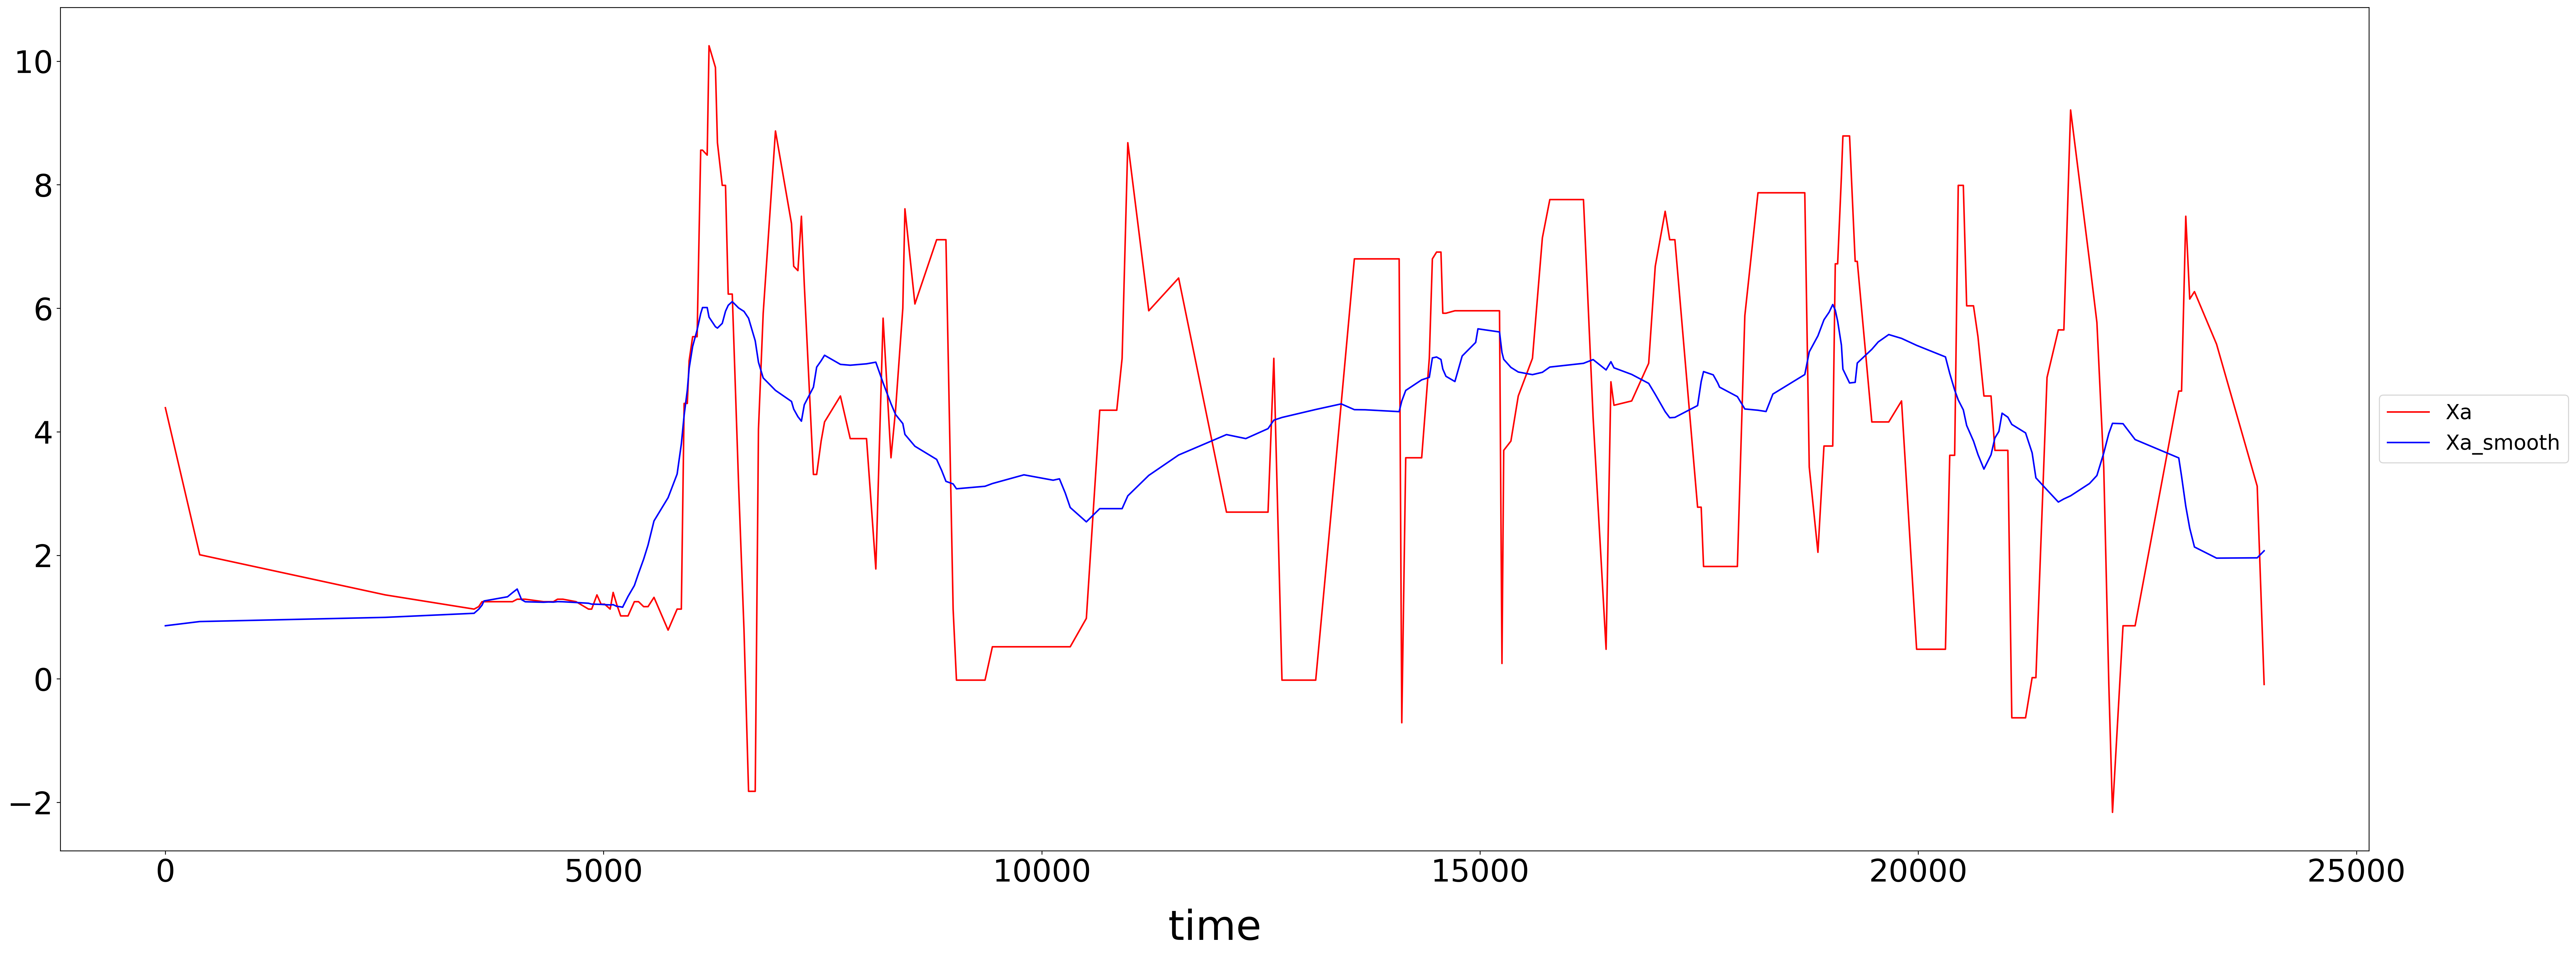

In [22]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fftpack import fft, ifft


data = pd.read_csv("./data1_20211227走路資料/手25sec1605cm34step.csv")
data = np.array(data)

x = data[:,14]
for i in range(len(x)-1,-1,-1):
    x[i]=data[i,14]-data[0,14]
y = data[:,7]

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 7], color = 'r', label = "Xa")
plt.plot(x, smooth(y,19), color = 'b', label = "Xa_smooth")
# plt.plot(x, smooth(y,3), color = 'r', label = "Xa1")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

## 加速度累加

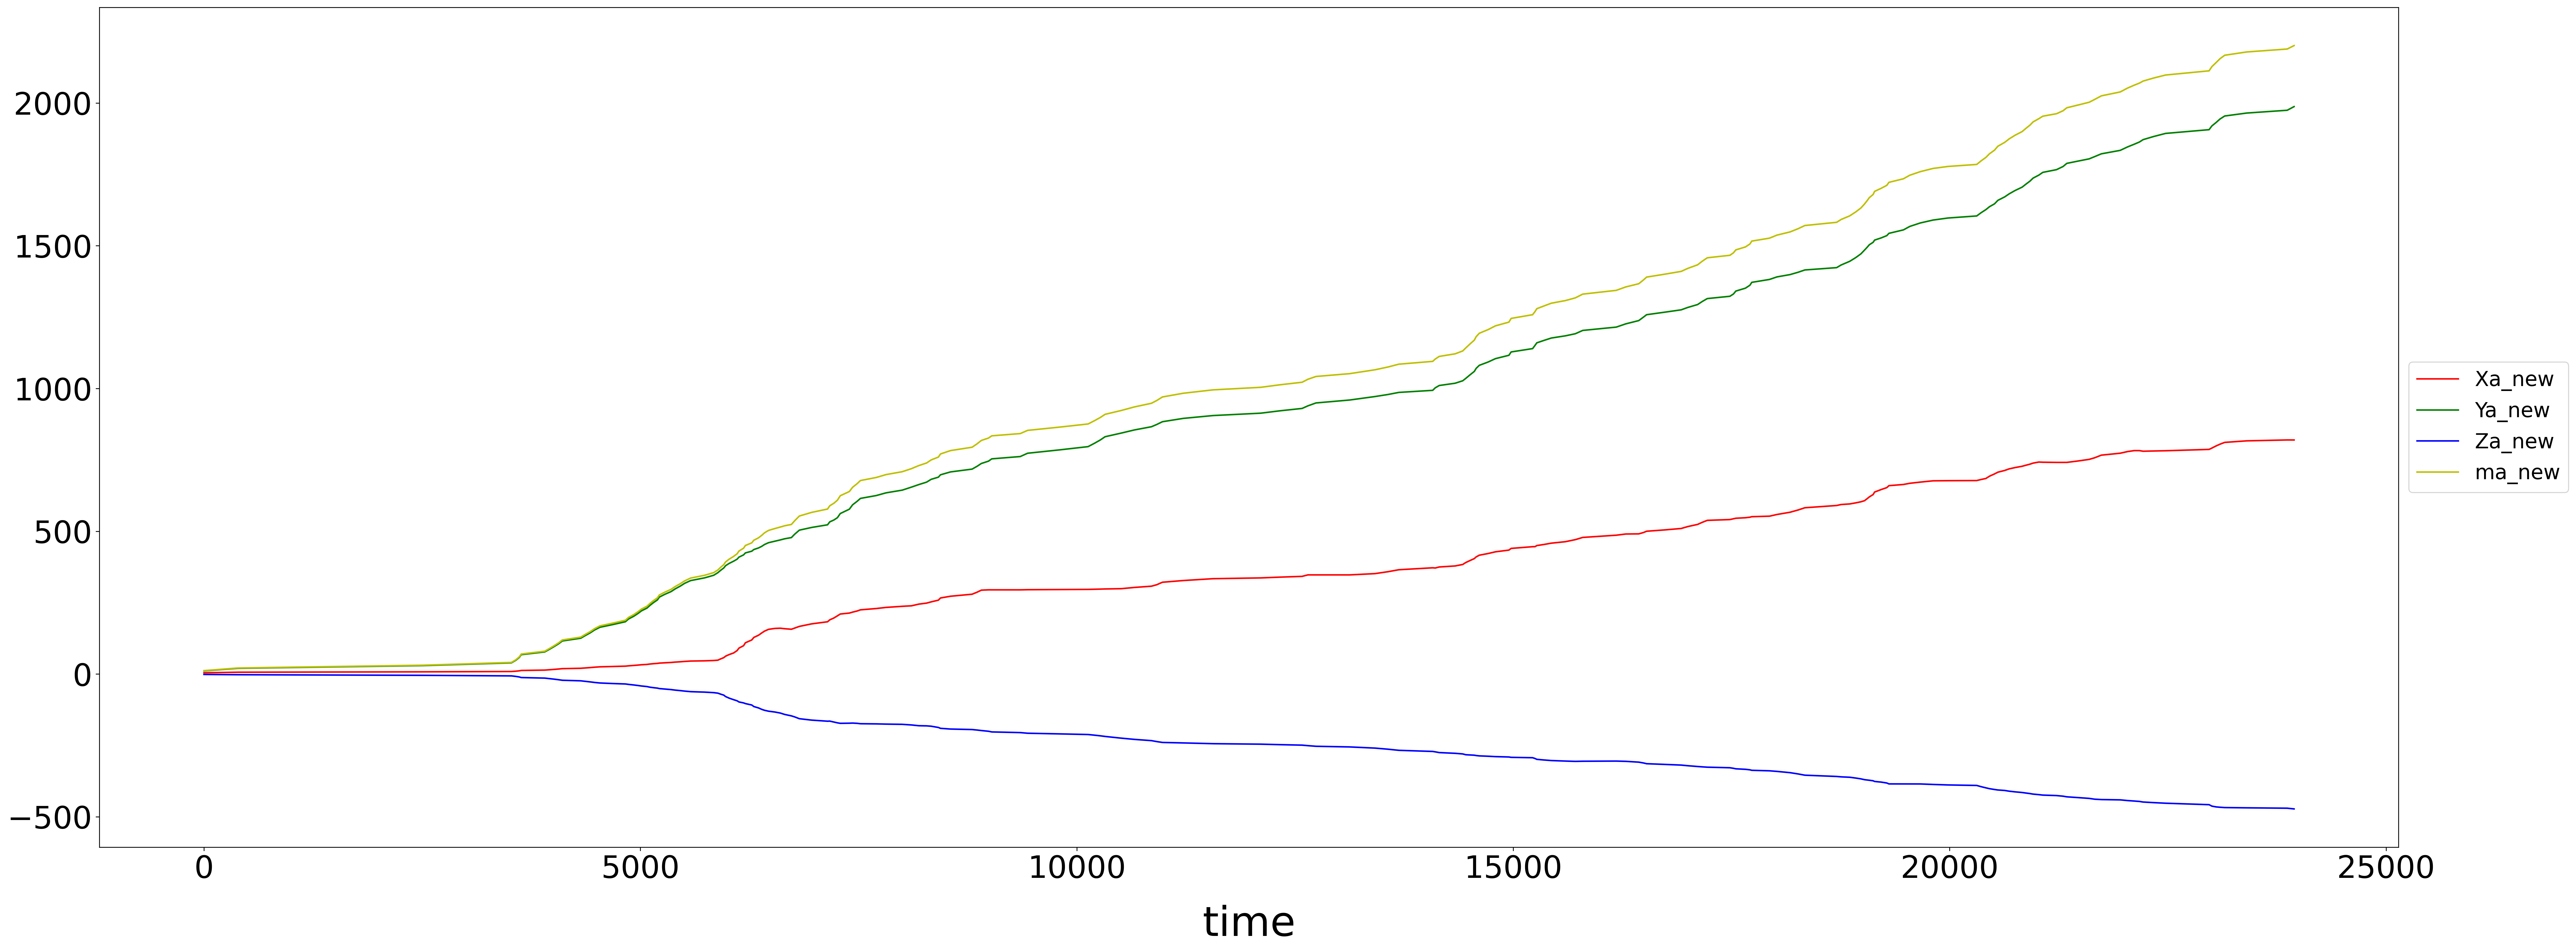

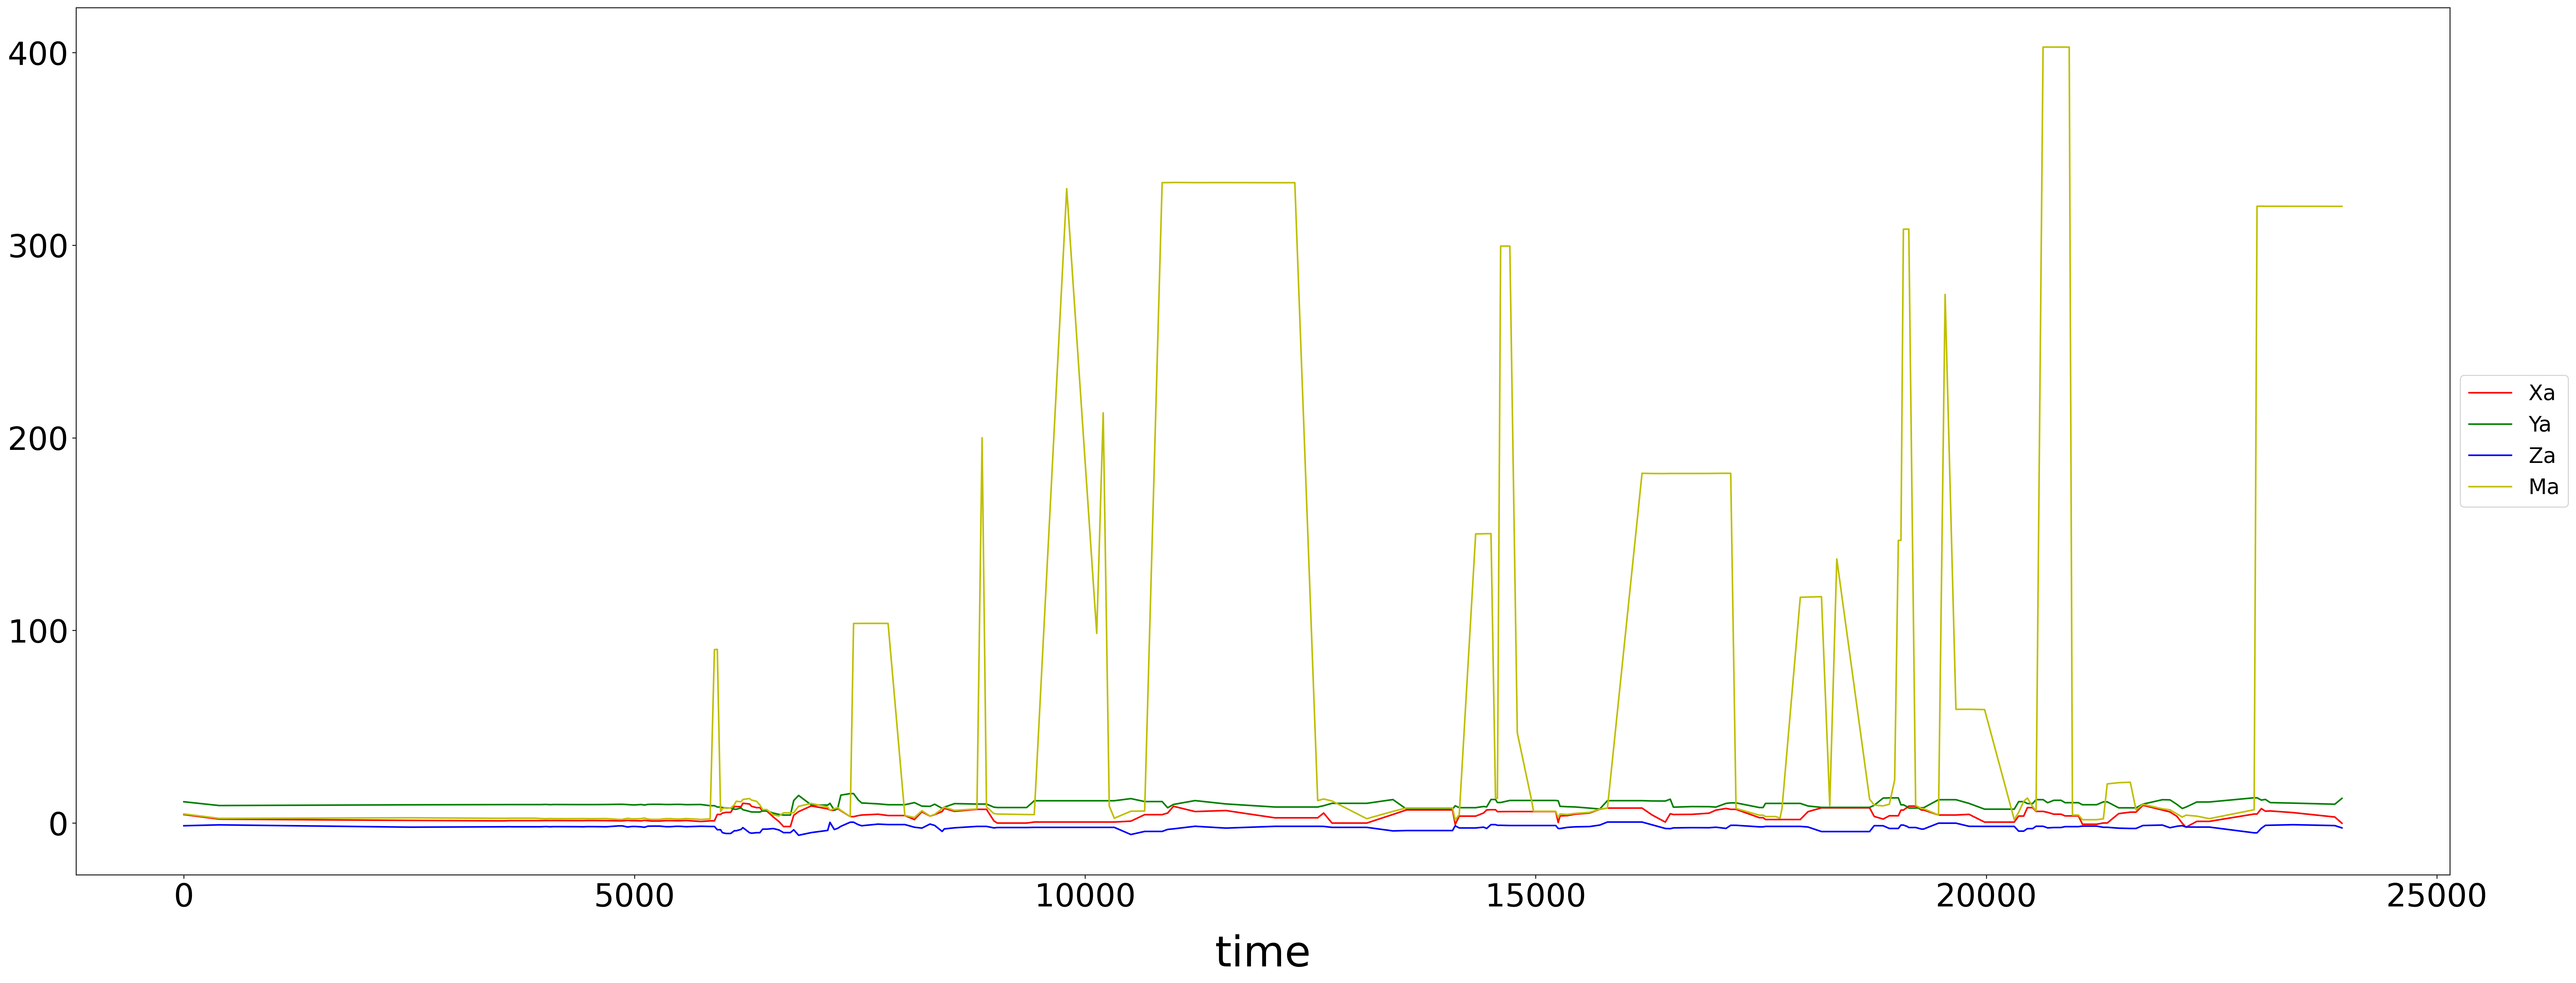

In [30]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft

xa=[]
ya=[]
za=[]
ma=[]
no_add_ma=[]
data = pd.read_csv("./data1_20211227走路資料/手25sec1605cm34step.csv")
data = np.array(data)
x = data[: , 14]
for i in range(len(x)-1,-1,-1):
    x[i]=data[i,14]-data[0,14]
for i in range(len(x)):
    if i>0:
        xa.append(xa[i-1]+data[i,7])
        ya.append(ya[i-1]+data[i,8])
        za.append(za[i-1]+data[i,9])
    else:
        xa.append(data[i,7])
        ya.append(data[i,8])
        za.append(data[i,9])
for i in range(len(x)):
    ma.append(math.sqrt(pow(xa[i],2)+pow(ya[i],2)+pow(za[i],2)))
    no_add_ma.append(math.sqrt(pow(data[i,7],2)+pow(data[i,2],8)+pow(data[i,9],2)))
    
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, xa, color = 'r', label = "Xa_new")
plt.plot(x, ya, color = 'g', label = "Ya_new")
plt.plot(x, za, color = 'b', label = "Za_new")
plt.plot(x, ma, color = 'y', label = "ma_new")

plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 7], color = 'r', label = "Xa")
plt.plot(x, data[: , 8], color = 'g', label = "Ya")
plt.plot(x, data[: , 9], color = 'b', label = "Za")
plt.plot(x, no_add_ma, color = 'y', label = "Ma")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()


## 陀螺儀累加(應該不能直接加，因為是角速度）

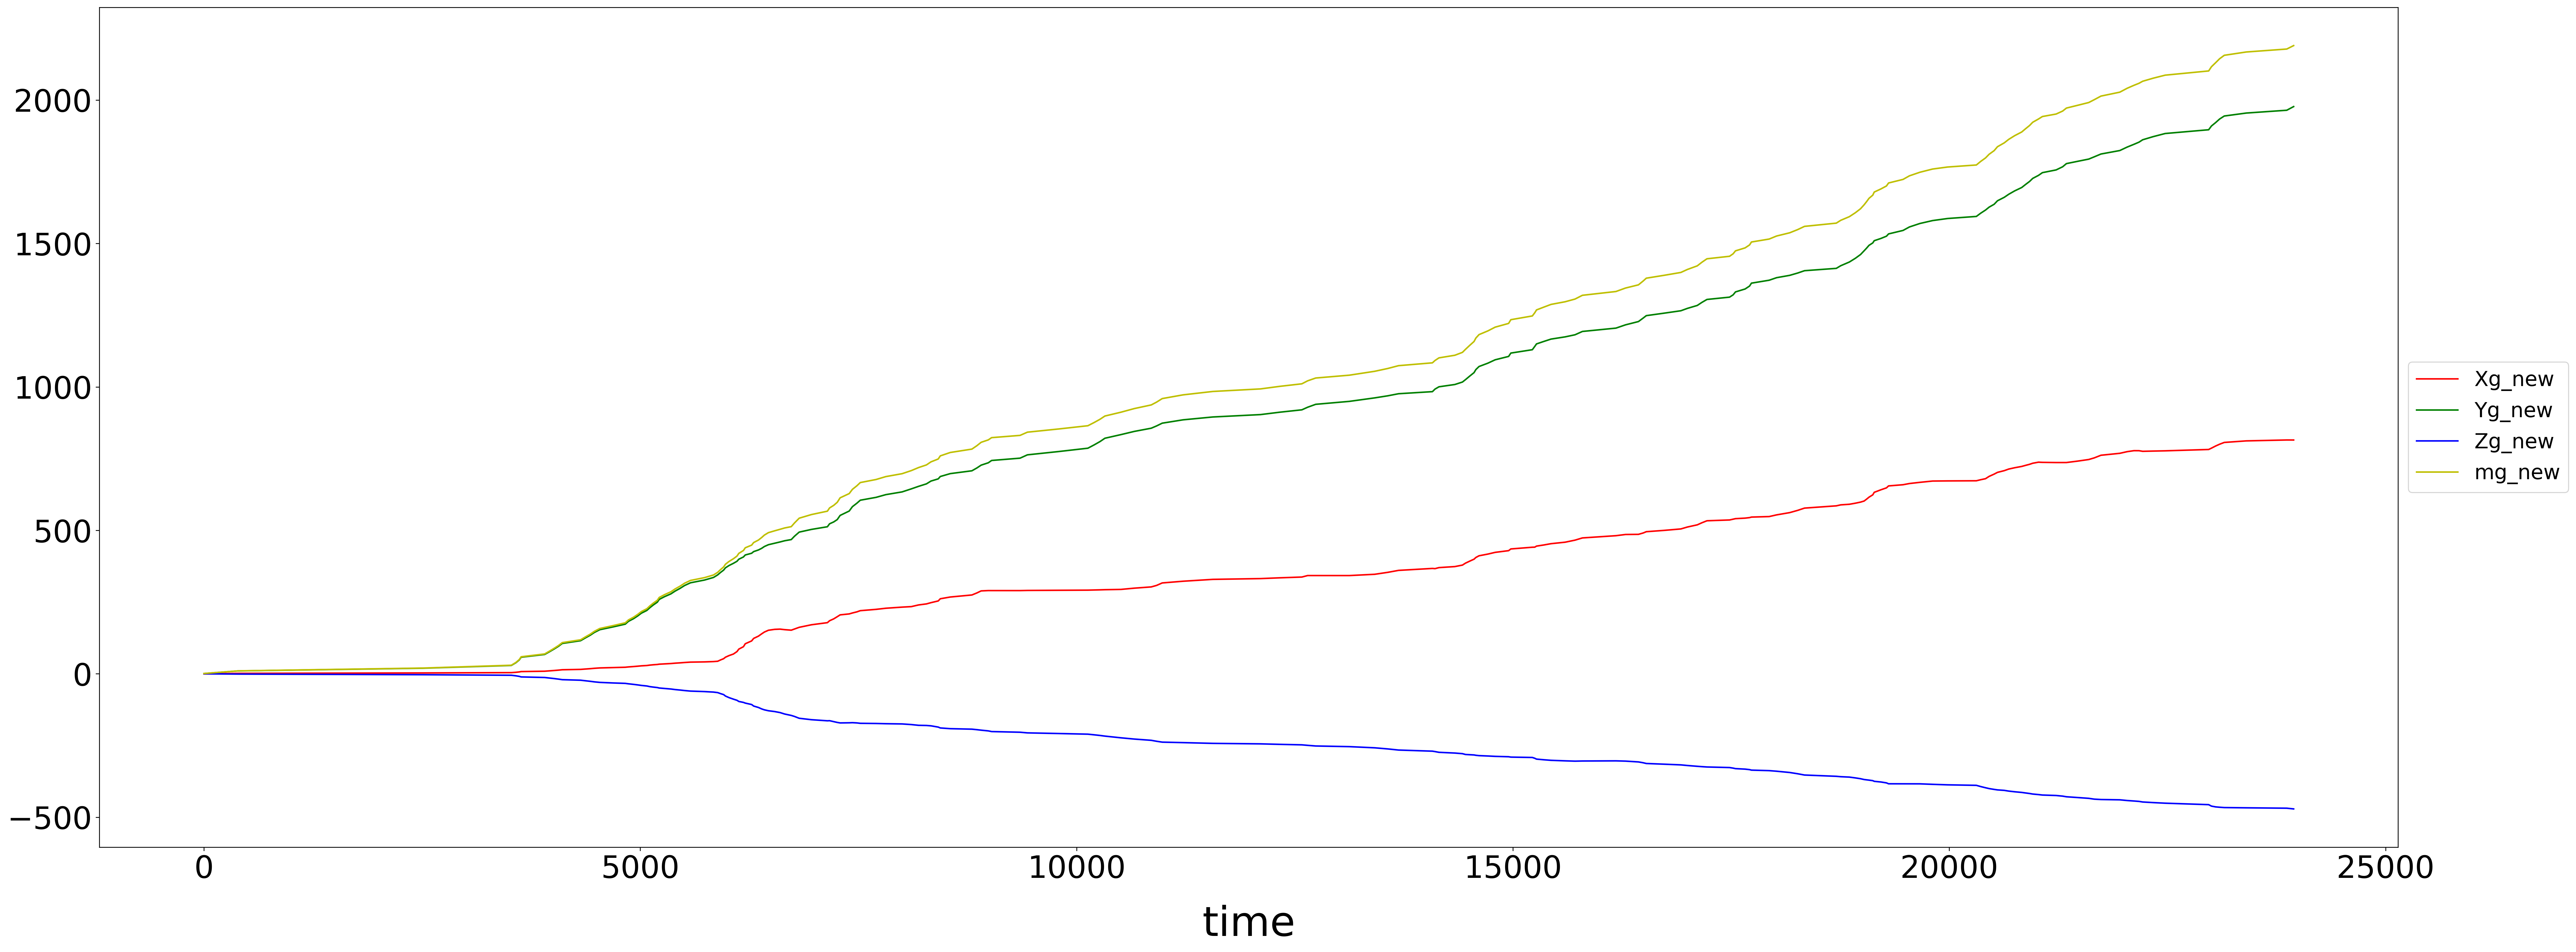

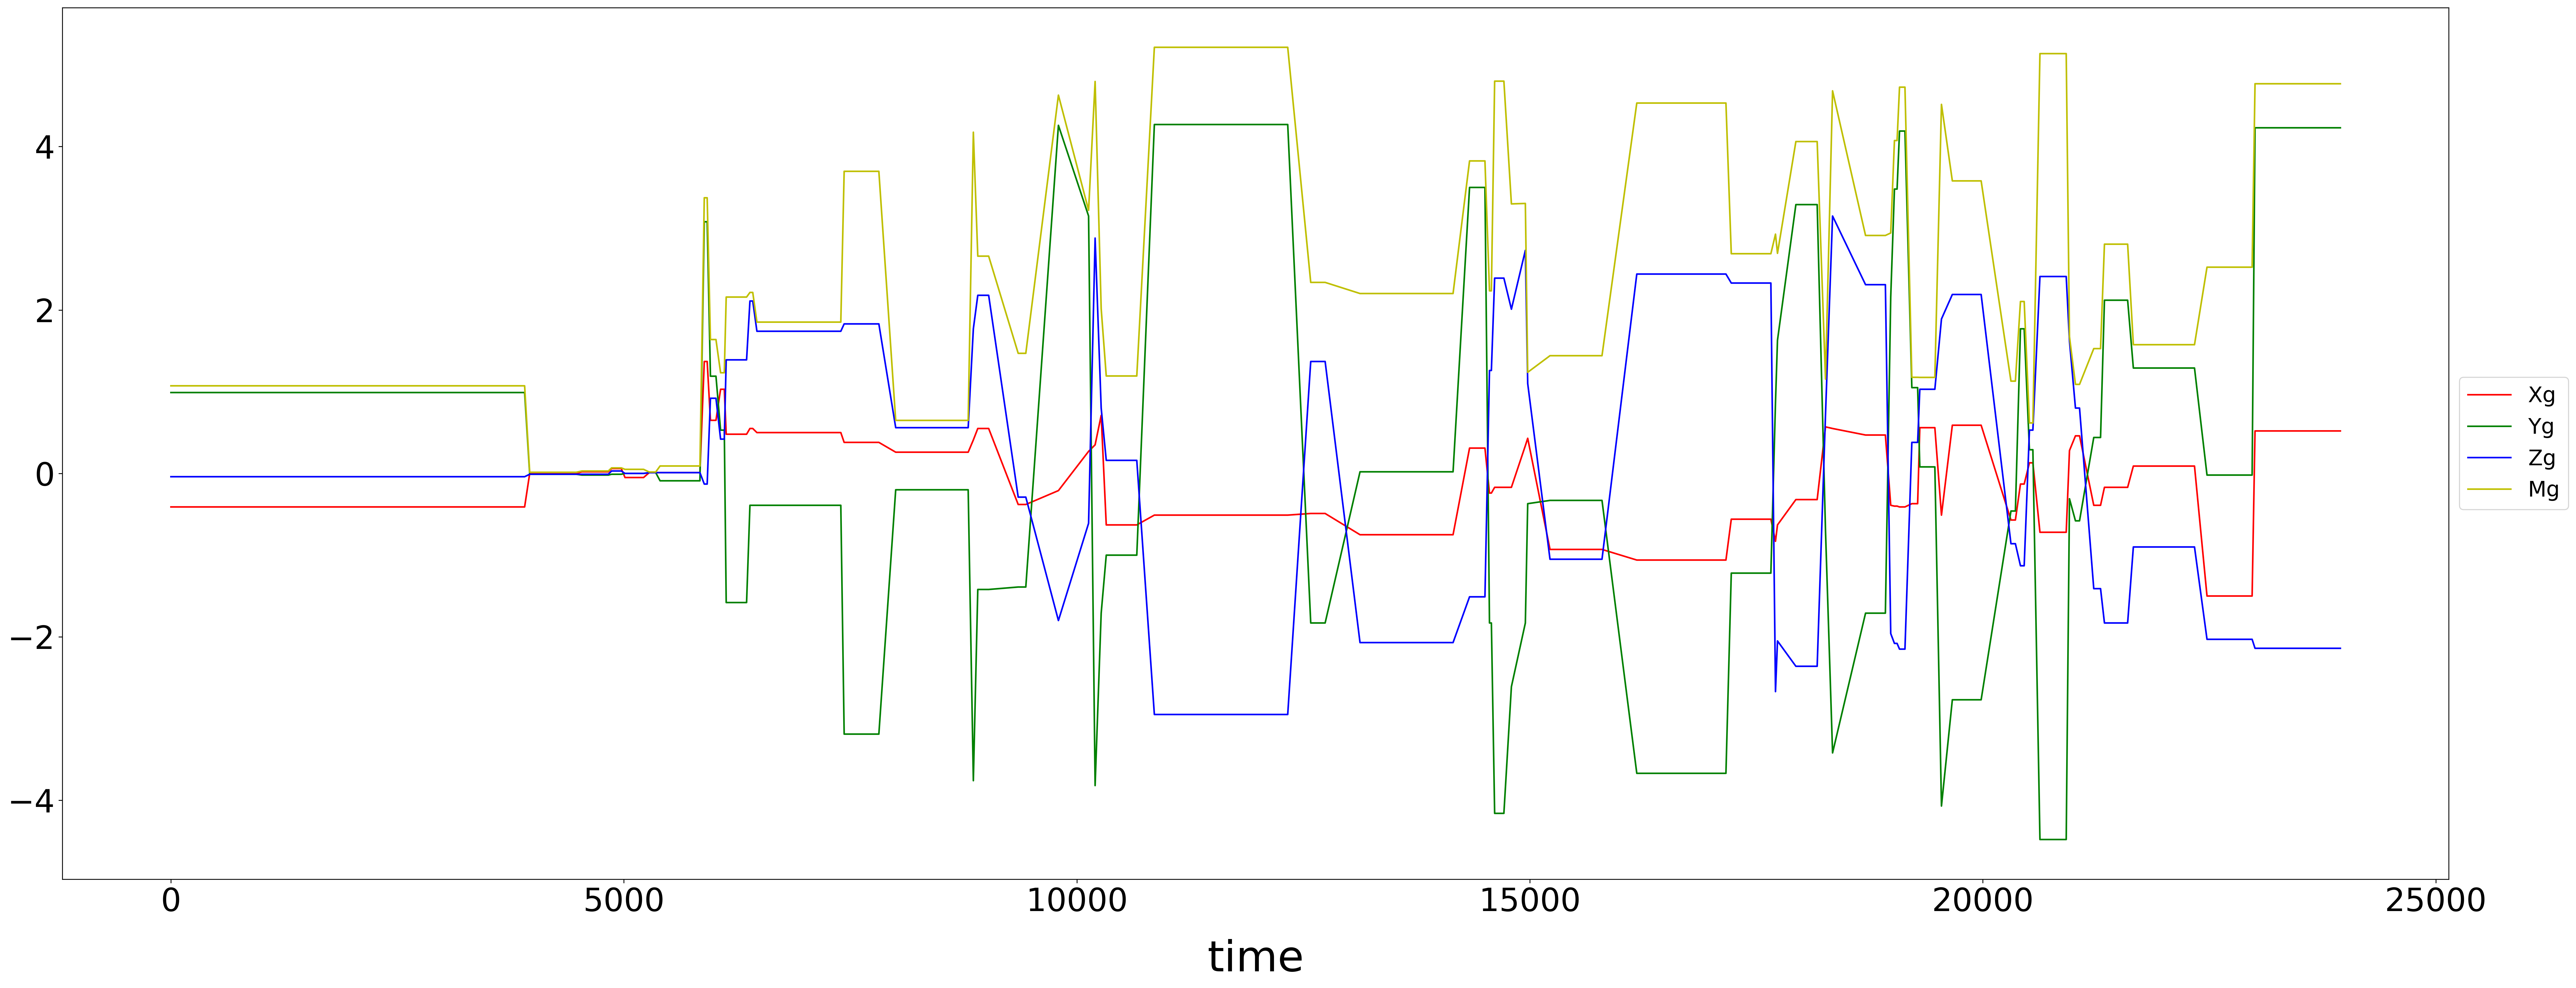

In [29]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft

xg=[]
yg=[]
zg=[]
mg=[]
no_add_mg=[]
data = pd.read_csv("./data1_20211227走路資料/手25sec1605cm34step.csv")
data = np.array(data)
x = data[: , 14]
for i in range(len(x)-1,-1,-1):
    x[i]=data[i,14]-data[0,14]
for i in range(len(x)):
    if i>0:
        xg.append(xg[i-1]+data[i,7])
        yg.append(yg[i-1]+data[i,8])
        zg.append(zg[i-1]+data[i,9])
    else:
        xg.append(data[i,1])
        yg.append(data[i,2])
        zg.append(data[i,3])
for i in range(len(x)):
    mg.append(math.sqrt(pow(xg[i],2)+pow(yg[i],2)+pow(zg[i],2)))
    no_add_mg.append(math.sqrt(pow(data[i,1],2)+pow(data[i,2],2)+pow(data[i,3],2)))
    
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, xg, color = 'r', label = "Xg_new")
plt.plot(x, yg, color = 'g', label = "Yg_new")
plt.plot(x, zg, color = 'b', label = "Zg_new")
plt.plot(x, mg, color = 'y', label = "mg_new")

plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(x, data[: , 1], color = 'r', label = "Xg")
plt.plot(x, data[: , 2], color = 'g', label = "Yg")
plt.plot(x, data[: , 3], color = 'b', label = "Zg")
plt.plot(x, no_add_mg, color = 'y', label = "Mg")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()
